<a href="https://colab.research.google.com/github/madhu9sudhana/Python_Examples/blob/master/PCA_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project Presentation on PCA
## Load dataset to perform PCA
  ### Here I am using Iris data set 

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

data = load_iris()
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df['target'] = data['target']
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Creating features and target dataframes

In [2]:
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target']
df_Ind = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
df_traget = df[['target']]
df_Ind.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Before performing PCA we need to do standard scaling of the data

In [3]:
df_Ind_std = (df_Ind - np.mean(df_Ind))/np.std(df_Ind)
df_Ind_std.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


###Calculate the transpose of scaled data and caluclate the co-variance of the transpose

In [4]:
features = df_Ind_std.T
cov_mat = np.cov(features)
print(cov_mat)

[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


### Eigen decomposition of the covariance matrix

In [5]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[2.93035378 0.92740362 0.14834223 0.02074601]


In [6]:
eigvals = pd.DataFrame(eig_vals, columns = ['Eig'])
eigvals['PCs']=eigvals.reset_index().index + 1
eigvals['Eig_perc'] = eigvals.Eig/eigvals.Eig.sum()
eigvals['Cum_Eig'] = eigvals.Eig.cumsum()
eigvals['Cum_perc'] = eigvals.Cum_Eig/eigvals.Eig.sum()
eigvals.head(10)


,Eig,PCs,Eig_perc,Cum_Eig,Cum_perc
0,2.930354,1,0.727705,2.930354,0.727705
1,0.927404,2,0.230305,3.857757,0.958010
2,0.148342,3,0.036838,4.006100,0.994848
3,0.020746,4,0.005152,4.026846,1.000000


### Plotting the variance importance of Principal components

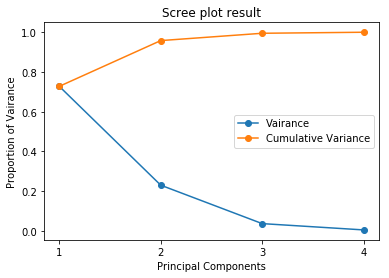

In [7]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
%matplotlib inline
plt.figure()
ax = plt.figure().gca()
plt.plot('PCs', 'Eig_perc', data = eigvals, marker='o', label='Vairance',)
plt.plot('PCs', 'Cum_perc', data = eigvals, marker='o', label='Cumulative Variance',)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel('Principal Components')
plt.ylabel('Proportion of Vairance')
plt.title('Scree plot result') # title  
plt.legend(loc='right')

plt.show()


### Projecting the data on to Principal conponent vectors

In [8]:
proj_x1 = df_Ind_std.dot(eig_vecs.T[0])
proj_x2 = df_Ind_std.dot(eig_vecs.T[1])


PC1 = pd.DataFrame(proj_x1, columns = ['pc1'])
PC2 = pd.DataFrame(proj_x2, columns = ['pc2'])
PC = pd.concat([PC1, PC2], axis=1)
PC['y_axis'] = 0
PC['label'] = df_traget
PC.head()

,pc1,pc2,y_axis,label
0,-2.264542,-0.505704,0,0
1,-2.086426,0.655405,0,0
2,-2.367950,0.318477,0,0
3,-2.304197,0.575368,0,0
4,-2.388777,-0.674767,0,0


### Scatter plot the Projected Prinicipal components

Text(0.5,1,'PCA result')

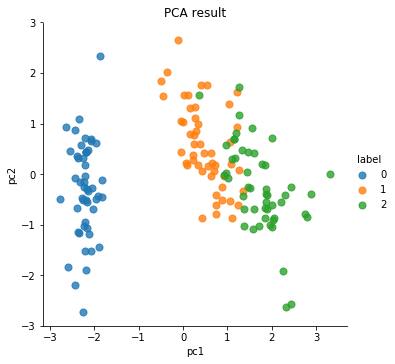

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.lmplot('pc1', 'pc2', data=PC, fit_reg=False,  # x-axis, y-axis, data, no line
           scatter_kws={"s": 50}, # marker size
           hue="label") # color
# title
plt.title('PCA result')

## Classification using Decision Tree algorithm on Data

In [0]:
# importing necessary libraries  
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
  
# dividing X, y into train and test data 
X_train, X_test, y_train, y_test = train_test_split(df_Ind, df_traget, test_size=0.2, random_state = 0) 
  
# training a DescisionTreeClassifier 
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train) 
dtree_predictions = dtree_model.predict(X_test) 
  
# creating a confusion matrix 
cm = confusion_matrix(y_test, dtree_predictions)

##Plot the Confusion Matrix

[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


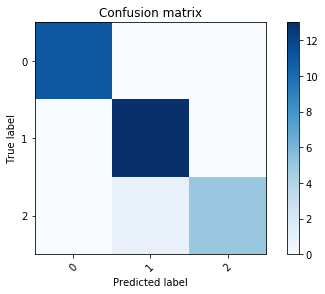

In [11]:
# Plot a confusion matrix.
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Encode text values to indexes(i.e. [1],[2],[3] for red,green,blue).
def encode_text_index(df, name):
    le = preprocessing.LabelEncoder()
    df[name] = le.fit_transform(df[name])
    return le.classes_

T_Labels = encode_text_index(df_traget, 'target')

plt.figure()
plot_confusion_matrix(cm, T_Labels)
print(cm)

## Using Prinincpal Comonent Analysis data for Training and Testing a New Model

[[11  0  0]
 [ 0 12  1]
 [ 0  3  3]]


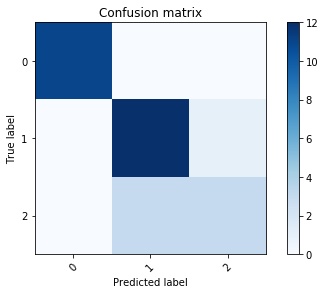

In [12]:
# dividing X, y into train and test data 
X_PCtrain, X_PCtest, y_PCtrain, y_PCtest = train_test_split(PC[['pc1', 'pc2']], PC[['label']], test_size=0.2, random_state = 0) 
  
# training a DescisionTreeClassifier 
from sklearn.tree import DecisionTreeClassifier 
pdtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_PCtrain, y_PCtrain) 
pdtree_predictions = pdtree_model.predict(X_PCtest) 
  
# creating a confusion matrix 
pcm = confusion_matrix(y_PCtest, pdtree_predictions)

plt.figure()
plot_confusion_matrix(pcm, T_Labels)
print(pcm)

### Validate using sklearn PCA function

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_Ind_std)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal_component_1', 'principal_component_2'])

finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
finalDf.head()

,principal_component_1,principal_component_2,target
0,-2.264542,0.505704,0
1,-2.086426,-0.655405,0
2,-2.367950,-0.318477,0
3,-2.304197,-0.575368,0
4,-2.388777,0.674767,0


Text(0.5,1,'PCA result from sklearn PCA')

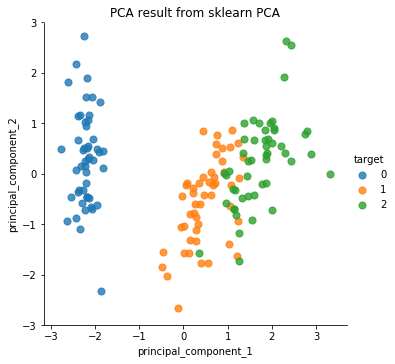

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.lmplot('principal_component_1', 'principal_component_2', data=finalDf, fit_reg=False,  # x-axis, y-axis, data, no line
           scatter_kws={"s": 50}, # marker size
           hue="target") # color
# title
plt.title('PCA result from sklearn PCA')